In [97]:
# Importing common libraries
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import statistics
import datetime

# Importing libraries for data visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline
from matplotlib.colors import BASE_COLORS

# Importing libraries for data modeling 
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Importing libraries to ignore warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

In [2]:
data = pd.read_csv(r'C:\Users\galrodri\Documents\GitHub\Final_Project\resortworldwide.csv')
data.head()

,URL,Rate,NameResort,Stars,Km Freeride,Continent,Country,State/Province,Altitude,Easy,Intermediate,Difficult,adult_price,Currency,Ski resort size,Slope offering. variety of runs,Lifts and cable cars,Snow reliability,Access. on-site parking,Orientation (trail map. information boards. sign-postings),Cleanliness and hygiene,Environmentally friendly ski operation,Mountain restaurants. ski huts. gastronomy,Après-ski,Accommodation offering directly at the slopes and lifts,Families and children,Beginners,Snow parks,Cross-country skiing and trails,country_code,latitude,longitude,Total Kms
0,http://www.skiresort.info/ski-resort/kitzski-k...,4.9,KitzSki – Kitzbühel/Kirchberg,5.0,45.0,Europe,Austria,Tyrol (Tirol),2000.0,101.0,61.0,17.0,55.0,European Euro,5.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,AT,47.516231,14.550072,179
1,http://www.skiresort.info/ski-resort/ischglsam...,4.8,Ischgl/Samnaun – Silvretta Arena,5.0,15.0,Europe,Austria,Tyrol (Tirol),2872.0,47.0,142.0,49.0,53.0,European Euro,5.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,4.0,AT,47.516231,14.550072,238
2,http://www.skiresort.info/ski-resort/skiwelt-w...,4.8,SkiWelt Wilder Kaiser-Brixental,5.0,26.0,Europe,Austria,Tyrol (Tirol),1957.0,122.0,129.0,33.0,49.0,European Euro,5.0,5.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,5.0,AT,47.516231,14.550072,284
3,http://www.skiresort.info/ski-resort/st-antons...,4.8,Ski Arlberg,5.0,200.0,Europe,Austria,Tyrol (Tirol),2811.0,132.0,123.0,50.0,53.0,European Euro,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,AT,47.516231,14.550072,305
4,http://www.skiresort.info/ski-resort/serfaus-f...,4.8,Serfaus-Fiss-Ladis,5.0,28.0,Europe,Austria,Tyrol (Tirol),2820.0,47.0,123.0,28.0,51.0,European Euro,5.0,5.0,5.0,5.0,4.0,5.0,4.0,4.0,5.0,4.0,4.0,5.0,4.0,5.0,4.0,AT,47.516231,14.550072,198


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5478 entries, 0 to 5477
Data columns (total 33 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   URL                                                          5478 non-null   object 
 1   Rate                                                         3471 non-null   float64
 2   NameResort                                                   5478 non-null   object 
 3   Stars                                                        413 non-null    float64
 4   Km Freeride                                                  480 non-null    float64
 5   Continent                                                    5469 non-null   object 
 6   Country                                                      5469 non-null   object 
 7   State/Province                                               5469 non-null   o

In [4]:
# We see that majority of the variables have null values. We will replace them with the average of each column
data.isna().sum()

URL                                                               0
Rate                                                           2007
NameResort                                                        0
Stars                                                          5065
Km Freeride                                                    4998
Continent                                                         9
Country                                                           9
State/Province                                                    9
Altitude                                                          9
Easy                                                              0
Intermediate                                                      0
Difficult                                                         0
adult_price                                                       9
Currency                                                          9
Ski resort size                                 

In [5]:
data.describe()

,Rate,Stars,Km Freeride,Altitude,Easy,Intermediate,Difficult,adult_price,Ski resort size,Slope offering. variety of runs,Lifts and cable cars,Snow reliability,Access. on-site parking,Orientation (trail map. information boards. sign-postings),Cleanliness and hygiene,Environmentally friendly ski operation,Mountain restaurants. ski huts. gastronomy,Après-ski,Accommodation offering directly at the slopes and lifts,Families and children,Beginners,Snow parks,Cross-country skiing and trails,latitude,longitude,Total Kms
count,3471.000000,413.000000,480.000000,5469.000000,5478.000000,5478.000000,5478.000000,5.469000e+03,3452.000000,3452.000000,3452.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.00000,429.000000,429.000000,429.000000,429.000000,4880.000000,4880.000000,5478.000000
mean,1.905733,2.970944,2.448958,1017.293107,4.016119,4.548266,2.026908,7.545086e+02,1.806402,1.954287,2.264108,3.850816,3.561772,3.319347,3.990676,3.552448,3.403263,2.675991,2.83683,3.843823,3.713287,2.965035,2.969697,45.651246,27.153449,10.390471
std,0.940525,1.356082,10.217407,822.678565,11.666099,13.266404,6.697797,1.562461e+04,0.845067,1.054178,1.044793,1.113272,0.869543,1.147172,0.520520,0.758241,0.941310,1.004619,1.30113,0.897213,0.909111,1.461720,1.295757,13.995871,57.856092,28.819054
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,-40.900557,-106.346771,0.000000
25%,1.200000,2.000000,0.000000,410.000000,0.300000,0.000000,0.000000,0.000000e+00,1.200000,1.000000,1.500000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,2.000000,2.00000,3.000000,3.000000,2.000000,2.000000,41.871940,10.451526,0.000000
50%,1.500000,3.000000,0.000000,843.000000,1.000000,0.500000,0.000000,2.000000e+01,1.500000,1.600000,1.800000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.00000,4.000000,4.000000,3.000000,3.000000,47.516231,14.550072,1.000000
75%,2.500000,4.000000,3.000000,1500.000000,3.000000,3.400000,1.000000,5.250000e+01,2.200000,2.600000,3.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.00000,5.000000,4.000000,4.000000,4.000000,51.165691,24.966760,9.000000
max,5.000000,5.000000,200.000000,5000.000000,312.000000,239.000000,126.000000,1.119000e+06,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,71.706936,174.885971,600.000000


# Section 1: Data Cleaning

In [6]:
data.columns = map(lambda x: x.lower().replace("-", "_").replace("/", "_").replace(" ", "_"), data.columns) # lowering headers
print(data.columns)

Index(['url', 'rate', 'nameresort', 'stars', 'km_freeride', 'continent',
       'country', 'state_province', 'altitude', 'easy', 'intermediate_',
       'difficult', 'adult_price', 'currency', 'ski_resort_size_',
       'slope_offering._variety_of_runs_', 'lifts_and_cable_cars_',
       'snow_reliability_', 'access._on_site_parking_',
       'orientation_(trail_map._information_boards._sign_postings)_',
       'cleanliness_and_hygiene_', 'environmentally_friendly_ski_operation_',
       'mountain_restaurants._ski_huts._gastronomy_', 'après_ski_',
       'accommodation_offering_directly_at_the_slopes_and_lifts_',
       'families_and_children_', 'beginners_', 'snow_parks_',
       'cross_country_skiing_and_trails_', 'country_code', 'latitude',
       'longitude', 'total_kms'],
      dtype='object')


In [7]:
data = data.rename(columns={'nameresort':'resort_name','intermediate_':'intermediate','ski_resort_size_':'resort_size','slope_offering._variety_of_runs_':'slope_variety','lifts_and_cable_cars_':'lifts','snow_reliability_':'snow_reliability','access._on_site_parking_':'parking','orientation_(trail_map._information_boards._sign_postings)_':'orientation','cleanliness_and_hygiene_':'hygiene','environmentally_friendly_ski_operation_':'environment','mountain_restaurants._ski_huts._gastronomy_':'food','après_ski_':'apres_ski','accommodation_offering_directly_at_the_slopes_and_lifts_':'accommodation','families_and_children_':'families','beginners_':'beginners','snow_parks_':'snowpark','cross_country_skiing_and_trails_':'other_activities'})
print(data.columns)

Index(['url', 'rate', 'resort_name', 'stars', 'km_freeride', 'continent',
       'country', 'state_province', 'altitude', 'easy', 'intermediate',
       'difficult', 'adult_price', 'currency', 'resort_size', 'slope_variety',
       'lifts', 'snow_reliability', 'parking', 'orientation', 'hygiene',
       'environment', 'food', 'apres_ski', 'accommodation', 'families',
       'beginners', 'snowpark', 'other_activities', 'country_code', 'latitude',
       'longitude', 'total_kms'],
      dtype='object')


In [25]:
data['currency'] = data['currency'].str.lower()
data.head()

,url,rate,resort_name,stars,km_freeride,continent,country,state_province,altitude,easy,intermediate,difficult,adult_price,currency,resort_size,slope_variety,lifts,snow_reliability,parking,orientation,hygiene,environment,food,apres_ski,accommodation,families,beginners,snowpark,other_activities,country_code,latitude,longitude,total_kms
0,http://www.skiresort.info/ski-resort/kitzski-k...,4.9,KitzSki – Kitzbühel/Kirchberg,5.0,45.0,Europe,Austria,Tyrol (Tirol),2000.0,101.0,61.0,17.0,55.0,european euro,5.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,AT,47.516231,14.550072,179
1,http://www.skiresort.info/ski-resort/ischglsam...,4.8,Ischgl/Samnaun – Silvretta Arena,5.0,15.0,Europe,Austria,Tyrol (Tirol),2872.0,47.0,142.0,49.0,53.0,european euro,5.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,4.0,AT,47.516231,14.550072,238
2,http://www.skiresort.info/ski-resort/skiwelt-w...,4.8,SkiWelt Wilder Kaiser-Brixental,5.0,26.0,Europe,Austria,Tyrol (Tirol),1957.0,122.0,129.0,33.0,49.0,european euro,5.0,5.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,5.0,AT,47.516231,14.550072,284
3,http://www.skiresort.info/ski-resort/st-antons...,4.8,Ski Arlberg,5.0,200.0,Europe,Austria,Tyrol (Tirol),2811.0,132.0,123.0,50.0,53.0,european euro,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,AT,47.516231,14.550072,305
4,http://www.skiresort.info/ski-resort/serfaus-f...,4.8,Serfaus-Fiss-Ladis,5.0,28.0,Europe,Austria,Tyrol (Tirol),2820.0,47.0,123.0,28.0,51.0,european euro,5.0,5.0,5.0,5.0,4.0,5.0,4.0,4.0,5.0,4.0,4.0,5.0,4.0,5.0,4.0,AT,47.516231,14.550072,198


# Section 2: Converting currency to EUR

In [26]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.ecb.europa.eu/stats/policy_and_exchange_rates/euro_reference_exchange_rates/html/index.en.html"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

table = soup.find_all("table", class_="forextable")[0]
rows = table.find_all("tr")

In [63]:
exchange = []
for row in rows[1:]:
    cols = row.find_all("td")
    currency_code = cols[0].get_text().strip()
    currency_name = cols[1].get_text().strip().lower()
    exchange_rate = cols[2].get_text().strip()
    exchange.append([currency_code, currency_name, exchange_rate])

exchange = pd.DataFrame(exchange, columns=["currency_code", "currency", "exchange_rate"])
exchange ['exchange_rate'] = pd.to_numeric(exchange['exchange_rate'])
exchange

,currency_code,currency,exchange_rate
0,USD,us dollar,1.09150
1,JPY,japanese yen,143.49000
2,BGN,bulgarian lev,1.95580
3,CZK,czech koruna,23.40900
4,DKK,danish krone,7.45100
5,GBP,pound sterling,0.87495
6,HUF,hungarian forint,376.10000
7,PLN,polish zloty,4.68630
8,RON,romanian leu,4.93690
9,SEK,swedish krona,11.38750


In [60]:
pd.to_numeric(exchange['exchange_rate'])

0         1.09150
1       143.49000
2         1.95580
3        23.40900
4         7.45100
5         0.87495
6       376.10000
7         4.68630
8         4.93690
9        11.38750
10        0.98780
11      149.70000
12       11.38550
13       21.01950
14        1.63120
15        5.50960
16        1.47040
17        7.50140
18        8.56820
19    16290.63000
20        3.92610
21       89.36550
22     1438.81000
23       19.96240
24        4.80150
25        1.73870
26       59.56200
27        1.45070
28       37.17100
29       19.89290
Name: exchange_rate, dtype: float64

In [64]:
add_euro = pd.DataFrame({'currency_code':'EUR','currency':'european euro','exchange_rate':1.0},index=[30])
add_euro

,currency_code,currency,exchange_rate
30,EUR,european euro,1.0


In [65]:
ex = pd.concat([exchange,add_euro])

In [73]:
df = pd.merge(data,ex, on='currency', how ='left')
df

,url,rate,resort_name,stars,km_freeride,continent,country,state_province,altitude,easy,intermediate,difficult,adult_price,currency,resort_size,slope_variety,lifts,snow_reliability,parking,orientation,hygiene,environment,food,apres_ski,accommodation,families,beginners,snowpark,other_activities,country_code,latitude,longitude,total_kms,currency_code,exchange_rate
0,http://www.skiresort.info/ski-resort/kitzski-k...,4.9,KitzSki – Kitzbühel/Kirchberg,5.0,45.0,Europe,Austria,Tyrol (Tirol),2000.0,101.0,61.0,17.0,55.0,european euro,5.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,AT,47.516231,14.550072,179,EUR,1.0
1,http://www.skiresort.info/ski-resort/ischglsam...,4.8,Ischgl/Samnaun – Silvretta Arena,5.0,15.0,Europe,Austria,Tyrol (Tirol),2872.0,47.0,142.0,49.0,53.0,european euro,5.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,4.0,AT,47.516231,14.550072,238,EUR,1.0
2,http://www.skiresort.info/ski-resort/skiwelt-w...,4.8,SkiWelt Wilder Kaiser-Brixental,5.0,26.0,Europe,Austria,Tyrol (Tirol),1957.0,122.0,129.0,33.0,49.0,european euro,5.0,5.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,5.0,AT,47.516231,14.550072,284,EUR,1.0
3,http://www.skiresort.info/ski-resort/st-antons...,4.8,Ski Arlberg,5.0,200.0,Europe,Austria,Tyrol (Tirol),2811.0,132.0,123.0,50.0,53.0,european euro,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,AT,47.516231,14.550072,305,EUR,1.0
4,http://www.skiresort.info/ski-resort/serfaus-f...,4.8,Serfaus-Fiss-Ladis,5.0,28.0,Europe,Austria,Tyrol (Tirol),2820.0,47.0,123.0,28.0,51.0,european euro,5.0,5.0,5.0,5.0,4.0,5.0,4.0,4.0,5.0,4.0,4.0,5.0,4.0,5.0,4.0,AT,47.516231,14.550072,198,EUR,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5473,http://www.skiresort.info/ski-resort/snowland-...,1.0,snowland-gramado,NaN,NaN,South America,Brazil,Rio Grande do Sul,780.0,0.1,0.0,0.0,0.0,-,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BR,-14.235004,-51.925280,0,NaN,NaN
5474,http://www.skiresort.info/ski-resort/ski-namibia/,1.0,ski-namibia,NaN,NaN,Africa,Namibia,Erongo,140.0,0.0,0.0,0.2,0.0,-,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-22.957640,18.490410,0,NaN,NaN
5475,http://www.skiresort.info/ski-resort/sky-resor...,2.0,sky-resort-ulaanbaatar,NaN,2.0,Asia,Mongolia,Ulaanbaatar,1596.0,3.0,2.0,1.0,69500.0,mongolian togrog,2.0,2.0,3.0,4.0,4.0,4.0,5.0,3.0,2.0,1.0,1.0,3.0,4.0,1.0,2.0,MN,46.862496,103.846656,6,NaN,NaN
5476,http://www.skiresort.info/ski-resort/snow-city...,NaN,snow-city-singapore,NaN,NaN,Asia,Singapore,Singapore,0.0,0.0,0.0,0.0,0.0,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SG,1.352083,103.819836,0,NaN,NaN


In [74]:
df['price_eur'] = df[['adult_price']].div(df.exchange_rate, axis=0)
df

,url,rate,resort_name,stars,km_freeride,continent,country,state_province,altitude,easy,intermediate,difficult,adult_price,currency,resort_size,slope_variety,lifts,snow_reliability,parking,orientation,hygiene,environment,food,apres_ski,accommodation,families,beginners,snowpark,other_activities,country_code,latitude,longitude,total_kms,currency_code,exchange_rate,price_eur
0,http://www.skiresort.info/ski-resort/kitzski-k...,4.9,KitzSki – Kitzbühel/Kirchberg,5.0,45.0,Europe,Austria,Tyrol (Tirol),2000.0,101.0,61.0,17.0,55.0,european euro,5.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,AT,47.516231,14.550072,179,EUR,1.0,55.0
1,http://www.skiresort.info/ski-resort/ischglsam...,4.8,Ischgl/Samnaun – Silvretta Arena,5.0,15.0,Europe,Austria,Tyrol (Tirol),2872.0,47.0,142.0,49.0,53.0,european euro,5.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,4.0,AT,47.516231,14.550072,238,EUR,1.0,53.0
2,http://www.skiresort.info/ski-resort/skiwelt-w...,4.8,SkiWelt Wilder Kaiser-Brixental,5.0,26.0,Europe,Austria,Tyrol (Tirol),1957.0,122.0,129.0,33.0,49.0,european euro,5.0,5.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,5.0,AT,47.516231,14.550072,284,EUR,1.0,49.0
3,http://www.skiresort.info/ski-resort/st-antons...,4.8,Ski Arlberg,5.0,200.0,Europe,Austria,Tyrol (Tirol),2811.0,132.0,123.0,50.0,53.0,european euro,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,AT,47.516231,14.550072,305,EUR,1.0,53.0
4,http://www.skiresort.info/ski-resort/serfaus-f...,4.8,Serfaus-Fiss-Ladis,5.0,28.0,Europe,Austria,Tyrol (Tirol),2820.0,47.0,123.0,28.0,51.0,european euro,5.0,5.0,5.0,5.0,4.0,5.0,4.0,4.0,5.0,4.0,4.0,5.0,4.0,5.0,4.0,AT,47.516231,14.550072,198,EUR,1.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5473,http://www.skiresort.info/ski-resort/snowland-...,1.0,snowland-gramado,NaN,NaN,South America,Brazil,Rio Grande do Sul,780.0,0.1,0.0,0.0,0.0,-,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BR,-14.235004,-51.925280,0,NaN,NaN,NaN
5474,http://www.skiresort.info/ski-resort/ski-namibia/,1.0,ski-namibia,NaN,NaN,Africa,Namibia,Erongo,140.0,0.0,0.0,0.2,0.0,-,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-22.957640,18.490410,0,NaN,NaN,NaN
5475,http://www.skiresort.info/ski-resort/sky-resor...,2.0,sky-resort-ulaanbaatar,NaN,2.0,Asia,Mongolia,Ulaanbaatar,1596.0,3.0,2.0,1.0,69500.0,mongolian togrog,2.0,2.0,3.0,4.0,4.0,4.0,5.0,3.0,2.0,1.0,1.0,3.0,4.0,1.0,2.0,MN,46.862496,103.846656,6,NaN,NaN,NaN
5476,http://www.skiresort.info/ski-resort/snow-city...,NaN,snow-city-singapore,NaN,NaN,Asia,Singapore,Singapore,0.0,0.0,0.0,0.0,0.0,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SG,1.352083,103.819836,0,NaN,NaN,NaN


# Section 3: Analyzing slope distribution and kilometres

In [75]:
df1 = df[['resort_name','altitude','easy','intermediate','difficult','price_eur','currency','total_kms','continent','country','country_code']]
df1.head()

,resort_name,altitude,easy,intermediate,difficult,price_eur,currency,total_kms,continent,country,country_code
0,KitzSki – Kitzbühel/Kirchberg,2000.0,101.0,61.0,17.0,55.0,european euro,179,Europe,Austria,AT
1,Ischgl/Samnaun – Silvretta Arena,2872.0,47.0,142.0,49.0,53.0,european euro,238,Europe,Austria,AT
2,SkiWelt Wilder Kaiser-Brixental,1957.0,122.0,129.0,33.0,49.0,european euro,284,Europe,Austria,AT
3,Ski Arlberg,2811.0,132.0,123.0,50.0,53.0,european euro,305,Europe,Austria,AT
4,Serfaus-Fiss-Ladis,2820.0,47.0,123.0,28.0,51.0,european euro,198,Europe,Austria,AT


In [76]:
df1.shape

(5478, 11)

In [78]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
altitude,5469.0,1017.293107,822.678565,0.0,410.000000,843.000000,1500.000000,5000.00000
easy,5478.0,4.016119,11.666099,0.0,0.300000,1.000000,3.000000,312.00000
intermediate,5478.0,4.548266,13.266404,0.0,0.000000,0.500000,3.400000,239.00000
difficult,5478.0,2.026908,6.697797,0.0,0.000000,0.000000,1.000000,126.00000
price_eur,3364.0,29.526781,21.796613,0.0,16.358268,25.308767,36.004391,426.01924
total_kms,5478.0,10.390471,28.819054,0.0,0.000000,1.000000,9.000000,600.00000


In [79]:
df2 = df1.dropna(axis = 0)
df2.shape

(2930, 11)

In [80]:
df2.head()

,resort_name,altitude,easy,intermediate,difficult,price_eur,currency,total_kms,continent,country,country_code
0,KitzSki – Kitzbühel/Kirchberg,2000.0,101.0,61.0,17.0,55.0,european euro,179,Europe,Austria,AT
1,Ischgl/Samnaun – Silvretta Arena,2872.0,47.0,142.0,49.0,53.0,european euro,238,Europe,Austria,AT
2,SkiWelt Wilder Kaiser-Brixental,1957.0,122.0,129.0,33.0,49.0,european euro,284,Europe,Austria,AT
3,Ski Arlberg,2811.0,132.0,123.0,50.0,53.0,european euro,305,Europe,Austria,AT
4,Serfaus-Fiss-Ladis,2820.0,47.0,123.0,28.0,51.0,european euro,198,Europe,Austria,AT


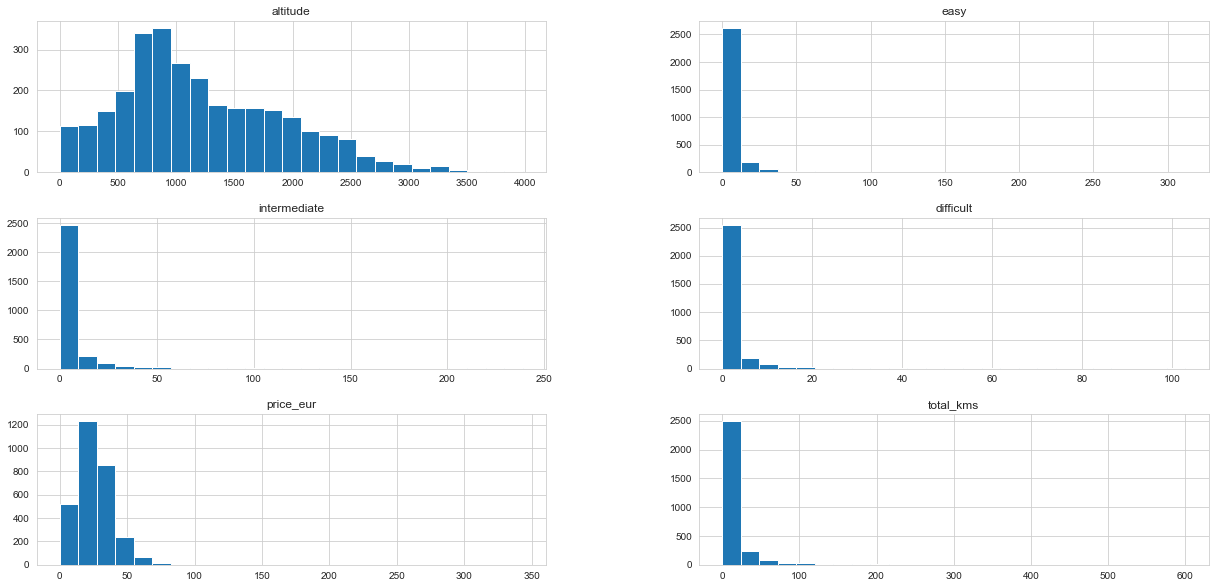

In [83]:
df2.hist(bins=25, figsize=(21, 10), layout=(3, 2));

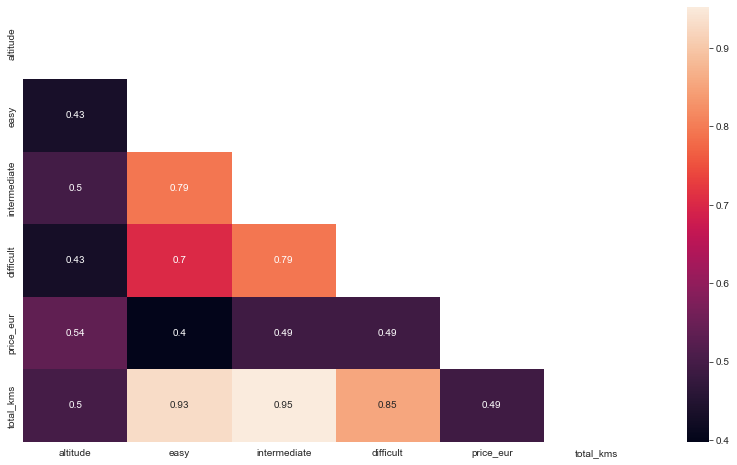

In [84]:
mask=np.zeros_like(df2.corr())
mask[np.triu_indices_from(mask)]=True
fig, ax=plt.subplots(figsize=(14, 8))
ax=sns.heatmap(df2.corr(), mask=mask, annot=True)
plt.show()

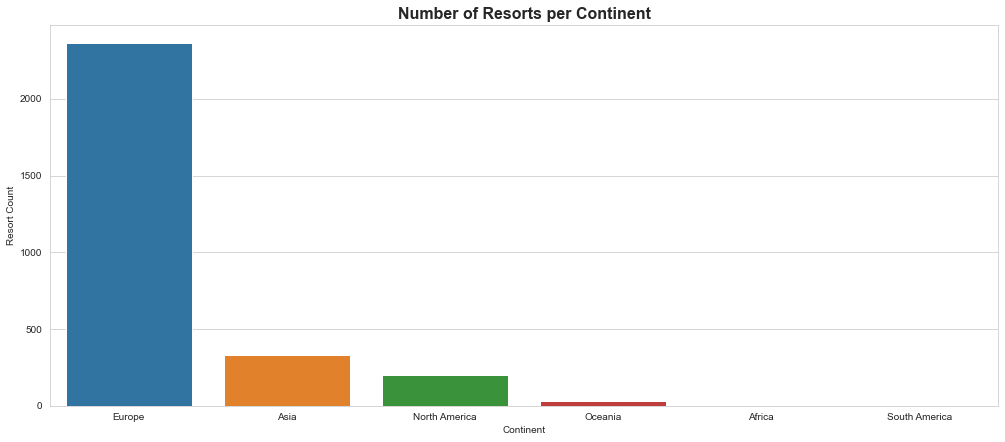

In [95]:
plt.figure(figsize=(17,7))
c = sns.countplot('continent', data=df2,order=df2['continent'].value_counts(ascending=False).index,dodge=False)
plt.ylabel('Resort Count')
plt.xlabel('Continent')
c.set_xlabel('Continent')
plt.title('Number of Resorts per Continent', fontsize=16.0, fontweight='bold')
plt.show()

# Section 4: Understanding relation between price and slope kilometres

In [86]:
df_model = df2[['easy','intermediate','difficult','total_kms','price_eur']]
df_model.head()

,easy,intermediate,difficult,total_kms,price_eur
0,101.0,61.0,17.0,179,55.0
1,47.0,142.0,49.0,238,53.0
2,122.0,129.0,33.0,284,49.0
3,132.0,123.0,50.0,305,53.0
4,47.0,123.0,28.0,198,51.0


In [ ]:
# Model 1 - Random Forest Regressor

In [87]:
x = df_model.drop(columns = "price_eur", axis=1)
y = df_model['price_eur']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)
# Create and train a Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=100)
regressor.fit(X_train, y_train)
# Use the trained model to make predictions on the test set
y_pred = regressor.predict(X_test)
# Evaluate the model's performance
score = regressor.score(X_test, y_test)
print("R^2:", score)

R^2: 0.539513636810614


In [ ]:
# Model 2 - Support Vector Regression

In [88]:
SupportVectorRegModel = SVR()
SVR_model = SupportVectorRegModel.fit(X_train,y_train)

In [89]:
SVR_predictions = SVR_model.predict(X_test)

In [90]:
MAE_svr = mean_absolute_error(y_test,SVR_predictions)
MSE_svr = mean_squared_error(y_test,SVR_predictions)
RMSE_svr = np.sqrt(MSE_svr)
R2_svr = r2_score(y_test,SVR_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE_svr))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE_svr))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE_svr))
print("The R2 of the model in the test set is: %4.2f" % (R2_svr))

The mean absolute error of the model in the test set is:   6.44
The mean squared error of the model in the test set is:  77.10
The root mean squared error of the model in the test set is:   8.78
The R2 of the model in the test set is: 0.54


In [ ]:
# Model 3 - Multiple Linear Regression

In [91]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [92]:
lin_test_pred = regressor.predict(X_test)
reg = LinearRegression().fit(X_train, y_train)

score_mlr = round(reg.score(X_test, y_test)*100,2)
score_mlr

40.41

In [93]:
y_pred = regressor.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 7.867892937510041
Mean Squared Error: 99.08156211620212
Root Mean Squared Error: 9.953972177789232


#### Iterating different models

In [104]:
models = [LinearRegression(), SVR(), RandomForestRegressor(n_estimators=100, random_state=100), KNeighborsRegressor(n_neighbors=5), MLPRegressor(random_state=1, max_iter=500)]

In [105]:
def train_models (models):
    score = []
    for m in models:
        m.fit(X_train, y_train)
        score.append(m.score(X_test, y_test))
        
    mod = pd.DataFrame([score], columns=['Linear Regression','SVR','Random Forest Regressor','K Neighbors Regressor','MLP Regressor'])
    
    return mod   

In [106]:
results = train_models(models)
results

,Linear Regression,SVR,Random Forest Regressor,K Neighbors Regressor,MLP Regressor
0,0.404122,0.536318,0.539514,0.530331,0.567423


# Section 5: Understanding relation between price and other variables

In [107]:
df.columns

Index(['url', 'rate', 'resort_name', 'stars', 'km_freeride', 'continent',
       'country', 'state_province', 'altitude', 'easy', 'intermediate',
       'difficult', 'adult_price', 'currency', 'resort_size', 'slope_variety',
       'lifts', 'snow_reliability', 'parking', 'orientation', 'hygiene',
       'environment', 'food', 'apres_ski', 'accommodation', 'families',
       'beginners', 'snowpark', 'other_activities', 'country_code', 'latitude',
       'longitude', 'total_kms', 'currency_code', 'exchange_rate',
       'price_eur'],
      dtype='object')

In [109]:
df3 = df[['price_eur','resort_size', 'slope_variety','lifts', 'snow_reliability', 'parking', 'orientation', 'hygiene','environment', 'food', 'apres_ski', 'accommodation', 'families','beginners', 'snowpark', 'other_activities',]]
df3

,price_eur,resort_size,slope_variety,lifts,snow_reliability,parking,orientation,hygiene,environment,food,apres_ski,accommodation,families,beginners,snowpark,other_activities
0,55.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0
1,53.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,4.0
2,49.0,5.0,5.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,5.0
3,53.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0
4,51.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,4.0,5.0,4.0,4.0,5.0,4.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5473,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5474,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5475,NaN,2.0,2.0,3.0,4.0,4.0,4.0,5.0,3.0,2.0,1.0,1.0,3.0,4.0,1.0,2.0
5476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
df3 = df3.dropna(axis=0)

In [113]:
df3.shape

(407, 16)

In [114]:
x = df3.drop(columns = "price_eur", axis=1)
y = df3['price_eur']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)
# Create and train a Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=100)
regressor.fit(X_train, y_train)
# Use the trained model to make predictions on the test set
y_pred = regressor.predict(X_test)
# Evaluate the model's performance
score = regressor.score(X_test, y_test)
print("R^2:", score)

R^2: 0.5803913948590234


In [116]:
models = [LinearRegression(), SVR(), RandomForestRegressor(n_estimators=100, random_state=100), KNeighborsRegressor(n_neighbors=5), MLPRegressor(random_state=1, max_iter=500)]

In [117]:
def train_models (models):
    score = []
    for m in models:
        m.fit(X_train, y_train)
        score.append(m.score(X_test, y_test))
        
    mod = pd.DataFrame([score], columns=['Linear Regression','SVR','Random Forest Regressor','K Neighbors Regressor','MLP Regressor'])
    
    return mod   

In [118]:
results = train_models(models)
results

,Linear Regression,SVR,Random Forest Regressor,K Neighbors Regressor,MLP Regressor
0,0.401861,0.324296,0.580391,0.520637,0.421497
